In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING DATASET

 1.Since data is in form of excel file we have to use pandas read_excel to load the data
 2.After loading it is important to check null values in a column or a row
 3.If it is present then following can be done,
        a.Filling NaN values with mean, median and mode using fillna() method
        b.If Less missing values, we can drop it as well

In [3]:
train_data=pd.read_excel('F:\komal\Air_line_project\Data_Train.xlsx')

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## as less missing values,I can directly drop these

In [7]:
train_data.dropna(inplace=True)


In [8]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### From description we can see that Date_of_Journey is a object data type,
     Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,bcz our 
     model will not be able to understand Theses string values,it just understand Time-stamp
    For this we require pandas to_datetime to convert object data type to datetime dtype.


    dt.day method will extract only day of that date
    dt.month method will extract only month of that date

In [10]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [11]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [13]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
train_data['Journey_day']=train_data['Date_of_Journey'].dt.day
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month

In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-27 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-27 05:50:00,2021-06-27 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-27 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-27 18:05:00,2021-06-27 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-27 16:50:00,2021-06-27 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [16]:
## Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-06-27 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-27 05:50:00,2021-06-27 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-27 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-06-27 18:05:00,2021-06-27 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-06-27 16:50:00,2021-06-27 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [18]:
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour

In [19]:
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute

In [20]:
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [21]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(train_data,'Dep_Time')
# Extracting Minutes
extract_min(train_data,'Dep_Time')
# Now we can drop Dep_Time as it is of no use
drop_column(train_data,'Dep_Time')

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-27 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-06-27 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-06-27 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [23]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
extract_hour(train_data,'Arrival_Time')

# Extracting minutes
extract_min(train_data,'Arrival_Time')

# Now we can drop Arrival_Time as it is of no use
drop_column(train_data,'Arrival_Time')

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [25]:
'2h 50m'.split(' ')

['2h', '50m']

#### Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

In [26]:
duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour

In [27]:
train_data['Duration']=duration

In [28]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [29]:
'2h 50m'.split(' ')[1][0:-1]

'50'

In [30]:
def hour(x):
    return x.split(' ')[0][0:-1]

In [31]:
def min(x):
    return x.split(' ')[1][0:-1]

In [32]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(min)

In [33]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [34]:
train_data.drop('Duration',axis=1,inplace=True)

In [35]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [36]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [37]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [38]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [39]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']
cat_col ##need to convert this data into integer data

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [40]:
cont_col=[col for col in train_data.columns if train_data[col].dtype!='O']
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

## Handling Categorical Data


### We are using 2 main Encoding Techniques to convert Categorical data into some numerical format
Nominal data --> data are not in any order --> OneHotEncoder is used in this case
Ordinal data --> data are in order -->       LabelEncoder is used in this case

In [41]:
categorical=train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [42]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## Airline vs Price Analysis


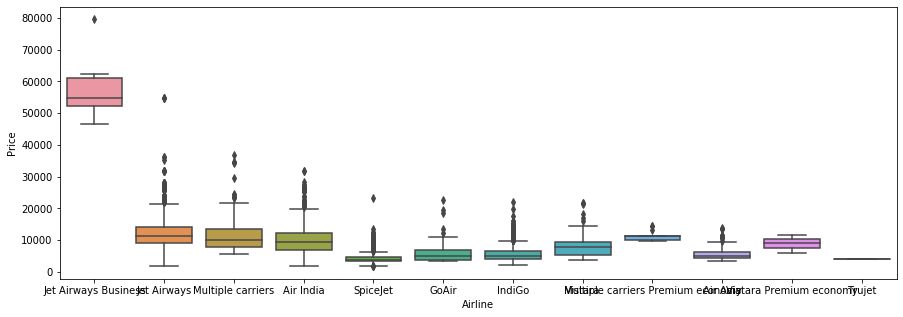

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False))

### Conclusion--> From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

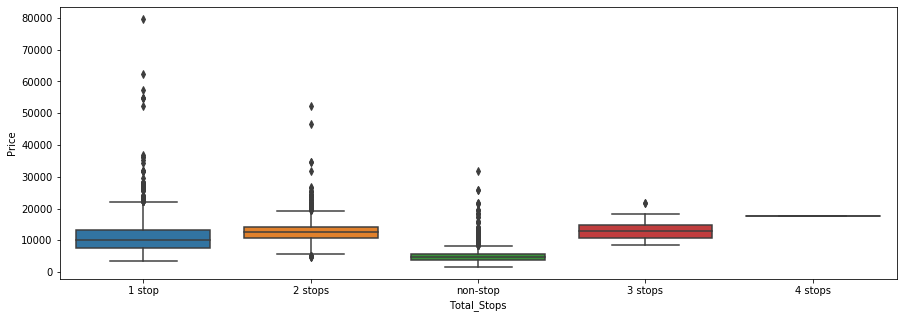

In [44]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=train_data.sort_values('Price',ascending=False))

In [45]:
len(categorical['Airline'].unique())

12

In [46]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [47]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 1080x360 with 0 Axes>

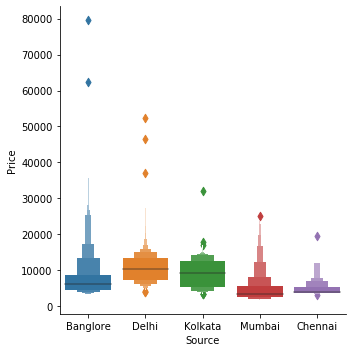

In [48]:
#  Source vs Price 
plt.figure(figsize=(15,5))
sns.catplot(y='Price',x='Source',data=train_data.sort_values('Price',ascending=False),kind='boxen')

In [49]:
# As Source is Nominal Categorical data we will perform OneHotEncoding


Source=pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [50]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [51]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [52]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
5                    CCU → BLR
6              BLR → BOM → DEL
7              BLR → BOM → DEL
8              BLR → BOM → DEL
9              DEL → BOM → COK
10             DEL → BLR → COK
11                   CCU → BLR
12                   MAA → CCU
13             CCU → BOM → BLR
14                   CCU → BLR
15       DEL → AMD → BOM → COK
16             DEL → PNQ → COK
17             DEL → BOM → COK
18       DEL → CCU → BOM → COK
19             DEL → BOM → COK
20             DEL → BOM → COK
21             BLR → COK → DEL
22                   BLR → DEL
23                   BLR → DEL
24             CCU → BOM → BLR
25       DEL → IDR → BOM → COK
26             DEL → LKO → COK
27             DEL → BOM → COK
28                   BLR → DEL
29                   MAA → CCU
                 ...          
10653          CCU → BOM → BLR
10654   

In [53]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

C:\anacoda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\anacoda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\anacoda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [54]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [55]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [56]:
categorical['Route_1'].fillna('None',inplace=True)
categorical['Route_2'].fillna('None',inplace=True)
categorical['Route_3'].fillna('None',inplace=True)
categorical['Route_4'].fillna('None',inplace=True)
categorical['Route_5'].fillna('None',inplace=True)

In [57]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,None,None


In [58]:
drop_column(categorical,'Route')

In [59]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [60]:
#now extract how many categories in each cat_feature
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



In [61]:
### as we will see we have lots of features in Route , one hot encoding will not be a better option lets appply Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [62]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [63]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [64]:
# Additional_Info contains almost 80% no_info,so we can drop this column
# we can drop Route as well as we have pre-process that column
    
drop_column(categorical,'Additional_Info')

In [65]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [66]:
categorical['Total_Stops'].value_counts()
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [67]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding key

dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [68]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [69]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [70]:
train_data[cont_col]

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45
5,3873,24,6,9,0,11,25,2,25
6,11087,3,12,18,55,10,25,15,30
7,22270,3,1,8,0,5,5,21,5
8,11087,3,12,8,55,10,25,25,30
9,8625,27,5,11,25,19,15,7,50


In [71]:
# Concatenate dataframe --> categorical + Airline + Source + Destination

data_train=pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [72]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [73]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [74]:
pd.set_option('display.max_columns',35)

In [75]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [76]:
data_train.columns

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Price', 'Journey_day', 'Journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

## outlier detection 

In [77]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

<Figure size 2160x1440 with 0 Axes>

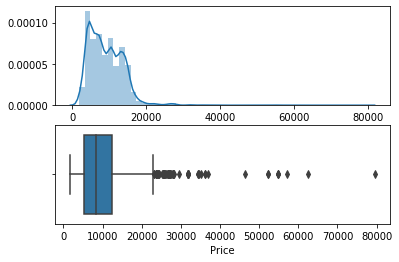

In [78]:
plt.figure(figsize=(30,20))
plot(data_train,'Price')

In [79]:
### separate your independent & dependent data

In [80]:
X=data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [81]:
y=data_train['Price']
y


0         3897
1         7662
2        13882
3         6218
4        13302
5         3873
6        11087
7        22270
8        11087
9         8625
10        8907
11        4174
12        4667
13        9663
14        4804
15       14011
16        5830
17       10262
18       13381
19       12898
20       19495
21        6955
22        3943
23        4823
24        7757
25       13292
26        8238
27        7682
28        4668
29        3687
         ...  
10653    14388
10654     4319
10655     5678
10656     5613
10657     9663
10658     5769
10659     4668
10660     4878
10661     8372
10662    12352
10663    11733
10664     4823
10665     4804
10666    10262
10667    11087
10668    21219
10669     9929
10670    11411
10671     3100
10672    11150
10673    16704
10674    11087
10675     3100
10676     9794
10677     3257
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [82]:
type(X)
type(y)
X.isnull().sum()
y.isnull().sum()

0

In [83]:
#### as now we dont have any missing value in data, we can definitely go ahead with Feature Selection

### Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable. 
    
### Why to apply Feature Selection?
    To select important features to get rid of curse of dimensionality ie..to get rid of duplicate features

In [84]:
np.array(X)

array([[ 0,  0, 13, ..., 10,  2, 50],
       [ 2,  2, 25, ..., 15,  7, 25],
       [ 2,  3, 32, ..., 25, 19,  0],
       ...,
       [ 0,  0, 13, ..., 20,  3,  0],
       [ 0,  0, 13, ..., 10,  2, 40],
       [ 2,  3, 16, ..., 15,  8, 20]], dtype=int64)

In [85]:
np.array(y)

array([ 3897,  7662, 13882, ...,  7229, 12648, 11753], dtype=int64)

# I wanted to find mutual information scores or matrix to get to know about the relationship between all features.

Feature Selection using Information Gain,

In [86]:
from sklearn.feature_selection import mutual_info_classif

In [87]:
mutual_info_classif(X,y)

array([2.14413561, 2.01830218, 2.77750033, 2.27389858, 1.52457501,
       0.7163881 , 0.76242078, 0.09739583, 0.66737476, 0.9363007 ,
       0.015708  , 0.56972892, 0.00858344, 0.33454764, 0.01478183,
       0.21551453, 0.        , 0.16608124, 1.53475862, 0.87716231,
       0.29691206, 1.54751302, 0.40026788, 0.30467533, 0.17657902,
       0.37428852, 1.10154795, 0.87022211, 1.44239042, 1.20957769,
       1.83705857, 1.54409345, 1.7708377 , 1.08752849])

In [88]:
mutual_info_classif(np.array(X),np.array(y))

array([2.14130592, 2.02505627, 2.77980656, 2.25492568, 1.46274189,
       0.77604791, 0.76548961, 0.08594995, 0.65540396, 0.91319462,
       0.        , 0.58721764, 0.00435926, 0.31944323, 0.00581018,
       0.22615221, 0.        , 0.16419217, 1.58532164, 0.88846099,
       0.28701254, 1.5445479 , 0.41482075, 0.29504156, 0.17968926,
       0.37962198, 1.10765397, 0.82842113, 1.43028908, 1.21659921,
       1.83138732, 1.51933901, 1.76737066, 1.09564341])

In [89]:
X.dtypes

Total_Stops                          int64
Route_1                              int32
Route_2                              int32
Route_3                              int32
Route_4                              int32
Route_5                              int32
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Chennai                              uint8
Delhi                                uint8
Kolkata                              uint8
Mumbai                               uint8
Cochin                               uint8
Delhi                                uint8
Hyderabad  

In [90]:
mutual_info_classif(X,y)

array([2.18375282, 2.04137314, 2.77354297, 2.31381749, 1.46968777,
       0.70737131, 0.754757  , 0.09100091, 0.66244436, 0.93662978,
       0.        , 0.56721426, 0.0208144 , 0.30865321, 0.00646767,
       0.22038494, 0.00508769, 0.17416673, 1.53093845, 0.87723112,
       0.29872166, 1.57652168, 0.39950222, 0.29340651, 0.18281372,
       0.39215138, 1.06815009, 0.86764068, 1.41562075, 1.23451399,
       1.85510061, 1.52293473, 1.77517677, 1.08184419])

In [91]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.145234
Route_1,2.060676
Route_2,2.788868
Route_3,2.274232
Route_4,1.477377
Route_5,0.712887
Air India,0.751520
GoAir,0.100517
IndiGo,0.678428
Jet Airways,0.926245


In [92]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.788868
Route_3,2.274232
Total_Stops,2.145234
Route_1,2.060676
Arrival_Time_hour,1.837225
Duration_hours,1.809371
Delhi,1.543597
Arrival_Time_minute,1.537797
Cochin,1.528752
Route_4,1.477377


#### split dataset into train & test

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [95]:
from sklearn import metrics
##dump your model using pickle so that we will re-use
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file=open('F:\komal\Air_line_project\model.pkl','wb')
        pickle.dump(model,file)

#### import randomforest class

In [96]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9457628070055137
predictions are: 
 [ 4452.3  14546.6   9470.8  ...  4888.    5085.4   3868.72]


r2 score: 0.7690540093032558
MAE: 1194.5784316762113
MSE: 4687938.194807354
RMSE: 2165.164703852193


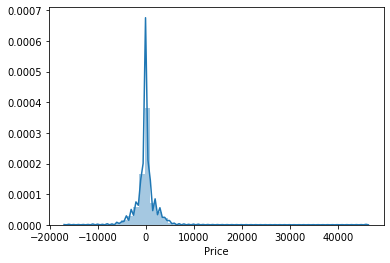

In [97]:
predict(RandomForestRegressor(),1)

#### play with multiple Algorithms

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

Training score : 0.9705901691559052
predictions are: 
 [ 4423. 14781. 11410. ...  4804.  4860.  3873.]


r2 score: 0.7114454288571987
MAE: 1274.2622367805334
MSE: 5857326.170787969
RMSE: 2420.1913500357714


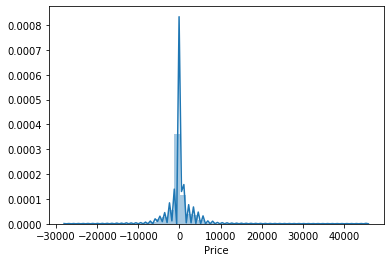

In [99]:
predict(DecisionTreeRegressor(),0)

Training score : 0.6272826296919493
predictions are: 
 [ 2844.15790245 11718.70718984  8515.01857887 ...  3534.8073802
  6736.71444828  4031.11833396]


r2 score: 0.6304414909528093
MAE: 1992.833978148277
MSE: 7501613.015890336
RMSE: 2738.9072667562764


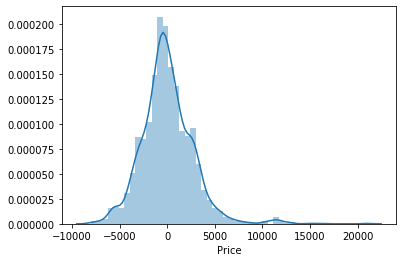

In [100]:
predict(LinearRegression(),0)

##### Hyperparameter Tuning
    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV--> Slow way to hypertune my model
    
    2.Assign hyperparameters in form of dictionary
    3.Fit the model
    4.Check best paramters and best score

In [101]:
from sklearn.model_selection import RandomizedSearchCV

In [102]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [103]:
# Create the random grid

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [104]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [105]:
### initialise your estimator
reg_rf=RandomForestRegressor()

In [106]:
# Random search of parameters, using 3 fold cross validation

rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [107]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [108]:
rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [109]:
prediction=rf_random.predict(X_test)

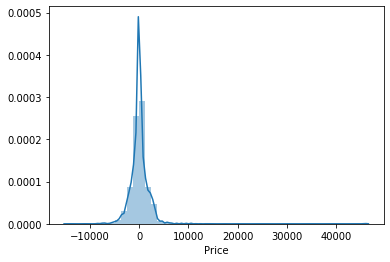

In [110]:
sns.distplot(y_test-prediction)

In [111]:
metrics.r2_score(y_test,prediction)

0.8180720218892759

In [112]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 1116.6538988712964
MSE 3692928.873613756
RMSE 1921.6994753638655


##### Save the model to reuse it again

In [113]:
!pip install pickle

  ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [114]:
import pickle

In [115]:
# open a file, where you want to store the data
file=open('rf_random.pkl','wb')

In [116]:
# dump information to that file
pickle.dump(rf_random,file)

In [117]:
model=open('rf_random.pkl','rb')
forest=pickle.load(model)

In [118]:
y_prediction=forest.predict(X_test)

In [119]:
y_prediction

array([ 4146.54957663, 12910.79978806,  8097.37934079, ...,
        4849.52233062,  4986.44459309,  3876.53980953])

In [120]:
metrics.r2_score(y_test,y_prediction)

0.8180720218892759